In [ ]:
# Load packages 
if(!require("tidyverse")) install.packages("tidyverse")
library(tidyverse)

# if running in google colab, uncomment and use the following line:
# streams <- read.csv("https://raw.githubusercontent.com/rachtorr/IndigenousEnvDataSci.github.io/refs/heads/main/MOD2/streams_data.csv")

# read in stream temp and DO combined data 
streams <- read.csv("streams_data.csv")

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Lesson 2.4: Exploring water quality data with graphs 

The descriptive statistics we generated using the `group_by()` and `summarise()` functions gave us an overview of how water temperature and dissolved oxygen differ between the two sites. These statistics are useful, and tribes are often asked to generate such statistics for reports (for instance the water quality reports tribes for the U.S. Environmental Protection Agency).

However, it is always a good idea to look at your data in many ways, including visualizing with graphs. In this module, we will look at two different graphs of the water quality data, then revisit the question of which stream would be best for the bull trout reintroduction.

## Plotting water temperature and dissolved oxygen 

### Scatter plots
Bull trout prefer water below 14&deg;C and above 6.2 mg/L dissolved oxygen, but these thresholds are only part of the story. We can use a scatter plot to look at all the data for both streams to see patterns in the overall temperature and DO values are.

We’ll use code that is similar to the scatter plot code in Module 1.

Warning message:
"Removed 5 rows containing missing values or values outside the scale range (`geom_point()`)."


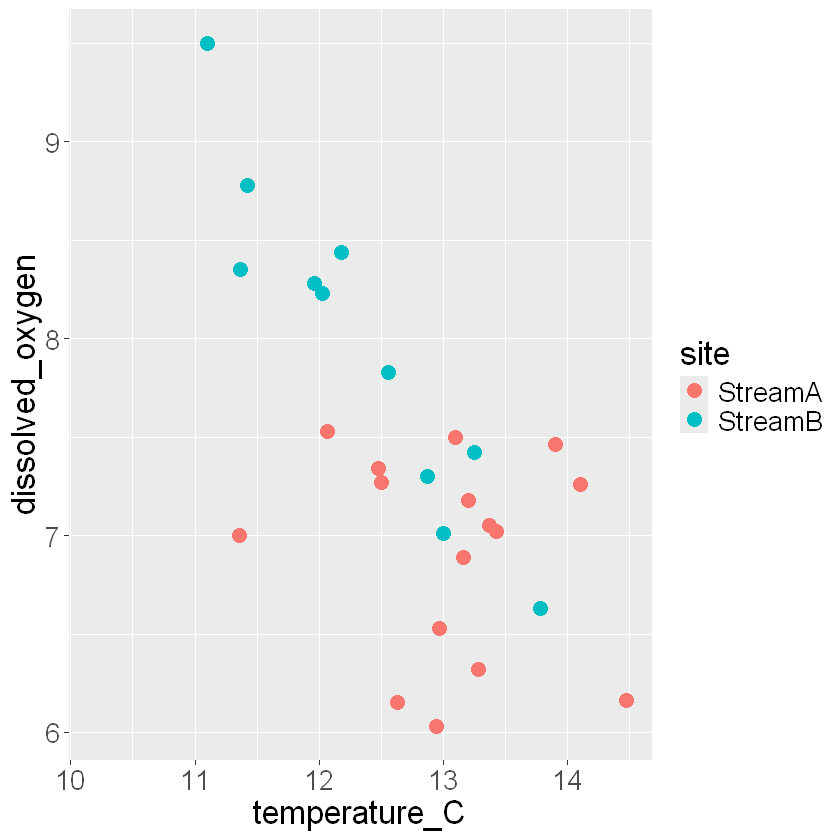

In [17]:

# The first line says we're making a plot using the streams dataframe.
# We're going to plot temperature_C against dissolved_oxygen.
# And we're going to color the symbols by site, distinguishing StreamA and StreamB.
# 'size' adjusts the size of the points to be larger 
# we are saving it as an object called 'scatter_plot' 
scatter_plot <- ggplot(streams, aes(temperature_C, dissolved_oxygen, color = site)) +
  # Then we specify a scatter plot (points) and set the size of the points to 4 
  geom_point(size=4) +
  # increase size of text 
  theme(text=element_text(size=20)) 

# see output 
scatter_plot

We can add markers in our plot to show how many points fall outside our water quality thresholds for dissolved oxygen and temperature. We do this using the `ggplot` geoms:
- `geom_hline(yintercept)`
- `geom_vline(xintercept)`
- like any other geoms, we can also change the setting of color, in this case we change it to red for both lines 

Warning message:
"Removed 5 rows containing missing values or values outside the scale range (`geom_point()`)."


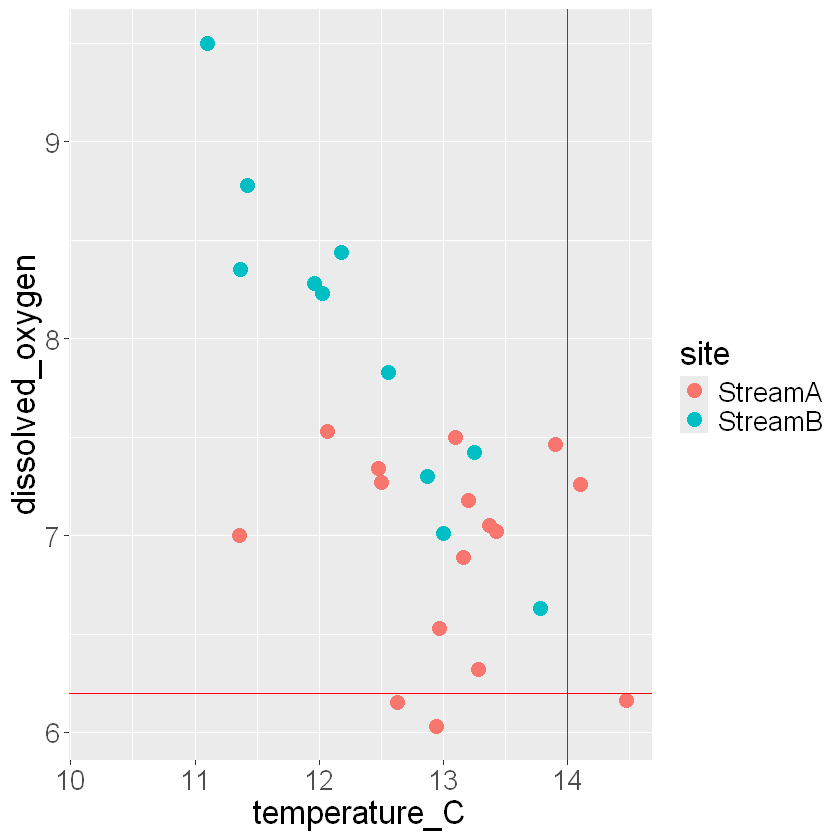

In [15]:
scatter_plot +
  # add a horizontal line to represent threshold of dissolved oxygen 
  geom_hline(yintercept = 6.2, col = "red") +
  # add a vertical line to represent a threshold of maximum temperature 
  geom_vline(xintercept = 14, col = "red") +
  # We'll use the same simple "theme" we used in module 1.
  theme(text=element_text(size=20))

🧠✍️ **Class Questions**

- Where are the best values of water quality for bull trout? Where are the worst values?
- When you ran the code chunk, you might have gotten a warning message that says, “Warning: Removed 5 rows containing missing values (geom_point()).” What does that mean? How does this affect your interpretation of the graph?
- Does looking at this graph change your opinion about whether Stream A or Stream B will be healthier for bull trout? What other information would help the tribe make this decision?

### Time series plots 

The scatter plot starts to give us more detail than the summary statistics, but there is still more useful information in our data set. K’avi Fish and Wildlife managers have measured temperature and DO for 15 years, which is a long time. Since we know that temperatures are rising, it would be useful to see if these values change over time (we’re looking for a trend).

To recap, Stream A is fed by a groundwater spring, and Stream B is fed by an alpine lake that is fed by a glacier. Because there sources of water are different, we can hypothesize that these streams may react differently to climate change.

🧠✍️ **Class Question:**
- Based on what we know about Stream A and Stream B, what would your hypothesis be on how the water quality for each stream may change as global temperatures increase with climate change?

We can assess our hypotheses by plotting water temperature and dissolved oxygen over time. We’ll make a small change to our `ggplot()` code to make a “time series” plot, which shows trends across time.

Here we will use `geom_line()` along with `geom_point()` to plot temperatures from both sites across the 15 years that the tribe has been monitoring water temperatures. Similar to the scatter plot, we can assign the site column to color.

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."
Warning message:
"Removed 3 rows containing missing values or values outside the scale range (`geom_point()`)."


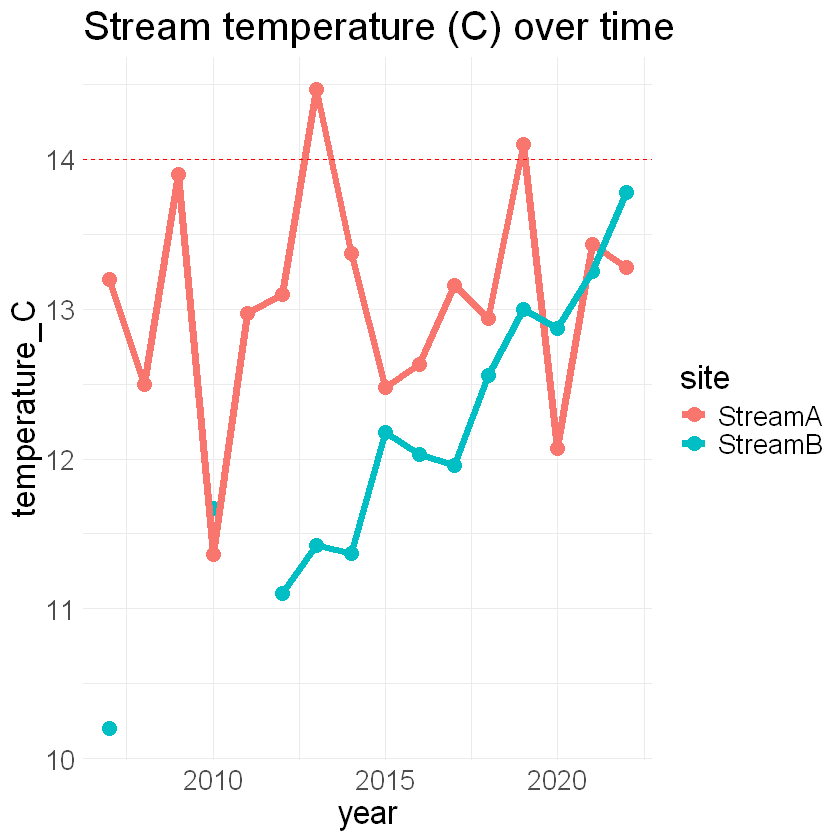

In [19]:
# The first line says we're making a plot using the streams dataframe.
# We're going to plot temperature_C over time (year).
# And we're going to color the symbols by site, distinguishing StreamA and StreamB.
ggplot(streams, aes(year, temperature_C, color = site)) +
  # We start by plotting points (as we did in the scatter plot code)
  geom_point(size=4) +
  # Next, we add lines connecting adjacent points in time using geom_line()
  # Note how ggplot() allows you to add features like lines in a step by step way. 
  geom_line(size=2) +
  # We'll add a line indicating the "danger zone" of temperatures above 14 C.
  geom_hline(yintercept = 14, col = "red", linetype="dashed") +
  # and we'll use the same theme as always.
  theme_minimal() +
  # make text larger 
  theme(text=element_text(size=20)) + 
  # set a title 
  ggtitle("Stream temperature (C) over time")

🧠✍️**Class Questions:**

- What do the two colored lines represent?
- Why are there breaks in the blue line between 2008-2011?
- Do the trends over time support your hypothesis about the stability of the temperature of the streams? Why or why not?

💻 **Your turn!** Using the code above as an example, see if you can make a similar time-series plot showing changes in dissolved oxygen for both streams over time:

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


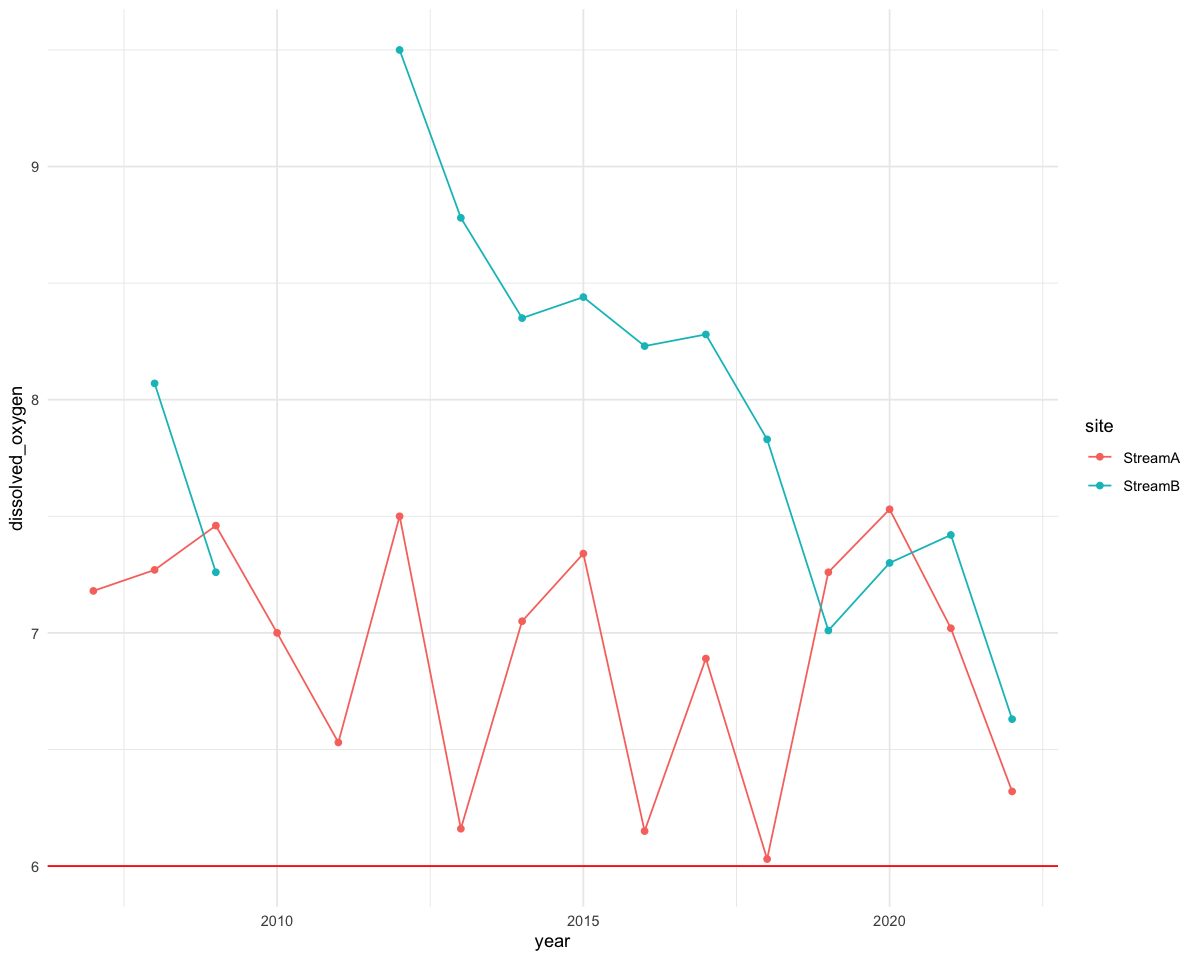

In [10]:
# add your code here to plot a time series of dissolved oxygen 


🧠✍️ **Class Questions:**

- Why do you think the water quality in Stream B is getting worse?
- Which stream do you think will be healthier for bull trout in the future?
- If you were using this analysis to make a recommendation to K’avi Fish and Wildlife managers, what would you suggest they consider as they decide which stream should be the site for bull trout reintroductions?
- Beyond the case of bull trout reintroductions, what other water quality issues are important to tribes?
- How can coding in R help inform tribal decisions about water quality?

## Recap Lesson 2.4

In this lesson, we plotted our data using `ggplot()`:
- we created a scatter plot of temperature and dissolved oxygen
- we created time series of both variables on separate plots
- for both plots, we grouped by stream using color 